In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('yahoo_answers_csv/train.csv', header=None)
train

,0,1,2,3
0,5,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,6,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,3,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,7,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,7,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...
...,...,...,...,...
1399995,3,do all these ads on tv of yoko etc regarding h...,NaN,I increased my height 2 feet afterwards so yes...
1399996,7,Ways to sell your video games?,Like if you want to sell your video games how ...,"ebay, electronic boutique, babbages or flea ma..."
1399997,3,is it normal to have nots in your breast or bo...,NaN,It can be normal as long as they are not cance...
1399998,1,Who can speak Hindi??,If you can write it here!!,Main hindi bol sakti hoon.kahiye.


In [3]:
test = pd.read_csv('yahoo_answers_csv/test.csv', header=None)
test

,0,1,2,3
0,9,What makes friendship click?,How does the spark keep going?,good communication is what does it. Can you m...
1,2,Why does Zebras have stripes?,What is the purpose or those stripes? Who do t...,this provides camouflage - predator vision is ...
2,4,What did the itsy bitsy sipder climb up?,NaN,waterspout
3,4,What is the difference between a Bachelors and...,NaN,One difference between a Bachelors and a Maste...
4,3,Why do women get PMS?,NaN,Premenstrual syndrome (PMS) is a group of symp...
...,...,...,...,...
59995,9,"if you could be any fantasy figure, who would ...",NaN,"The invisible man, I'd be straight into the gi..."
59996,8,Tell me something about life most people don't...,"Do you know anything about life, or words of w...",That there is a hell and everyone thinks their...
59997,3,Why are men always thinking of sex?,NaN,It's wired in our brain
59998,6,est ce que DOMENECH est un entraineur: 1: de f...,NaN,de foot mais pas pour être sélectionneur d'une...


In [12]:
train.iloc[8][3]

'Well.  Everyone has different definition on what \'beauty\' is.  I like Lin Qingxia, but I think many girls are prettier than she was. (She is more than 40 years old now). \\nIf "Lin Qingxia" is the most beautiful woman in the Chinese cinema, the most handsome man in Chinese cinema should be "Chin Han" because they always made movies together.\\nHowever, A male movie star once was asked his girlfriend in real life or the girlfriend in movie is more beautiful.  He gave a very good answer: "I think my mother is the most beautiful woman in the world."  :)'

In [ ]:
train[3]

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.tokenize import RegexpTokenizer
import os
import networkx as nx

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stopwordsList = stopwords.words('english')
stop_words = set(stopwords.words('english'))
q1_noGrammer = tokenizer.tokenize(train[3].values[0])
# q1_word_tokens = word_tokenize(q1_noGrammer)
filtered_sentence_q1 = [ps.stem(w) for w in q1_noGrammer if not w.lower() in stop_words]




In [ ]:
sentcount = 0
word_frequency={}
for i in filtered_sentence_q1:
    if i in word_frequency:
        word_frequency[i]+=1   
    else:
        word_frequency[i]=1

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stopwordsList = stopwords.words('english')
stop_words = set(stopwords.words('english'))
train1 = train[[1,3]].dropna()
for docnum in range(len(train)):
    if(docnum % 100000 == 0):
        print(docnum)
    q1_noGrammer = tokenizer.tokenize(train1[3].values[docnum])
    # q1_word_tokens = word_tokenize(q1_noGrammer)
    filtered_sentence_q1 = [ps.stem(w) for w in q1_noGrammer if not w.lower() in stop_words]
    word_frequency={}
    for i in filtered_sentence_q1:
        if i in word_frequency:
            word_frequency[i]+=1   
        else:
            word_frequency[i]=1
    df = pd.DataFrame()
    df['word'] = word_frequency.keys()
    df['document'] = f'doc{docnum}'
    df['weight'] = word_frequency.values()
    if not os.path.isfile('answers_to_graph.csv'):
        df.to_csv('answers_to_graph.csv', header='column_names')
    else: # else it exists so append without writing the header
        df.to_csv('answers_to_graph.csv', mode='a', header=False)

In [ ]:
docnum

In [ ]:
train[3].values[docnum]

In [57]:
df = pd.read_csv('answers_to_graph.csv')
df

,Unnamed: 0,word,document,weight
0,0,optic,doc0,1
1,1,mice,doc0,1
2,2,use,doc0,2
3,3,led,doc0,1
4,4,camera,doc0,2
...,...,...,...,...
36207157,126,dropdown,doc1375420,1
36207158,127,menu,doc1375420,1
36207159,128,type,doc1375420,1
36207160,129,keyword,doc1375420,1


In [58]:

df = pd.read_csv('answers_to_graph.csv')
df = df[['word','document','weight']]
df

,word,document,weight
0,optic,doc0,1
1,mice,doc0,1
2,use,doc0,2
3,led,doc0,1
4,camera,doc0,2
...,...,...,...
36207157,dropdown,doc1375420,1
36207158,menu,doc1375420,1
36207159,type,doc1375420,1
36207160,keyword,doc1375420,1


In [ ]:
doc_frequency={}
docs = df['document']
for i in docs:
    if i in doc_frequency:
        doc_frequency[i]+=1   
    else:
        doc_frequency[i]=1

In [ ]:
filter_doc_frequency = {}
max_wdf = 0
min_wdf = 9999999999
for doc in doc_frequency:
    wdf = doc_frequency[doc]
    if(max_wdf < wdf):
        max_wdf = wdf
    if(wdf > 10):
        filter_doc_frequency[doc] = wdf

In [ ]:
len(filter_doc_frequency)

In [ ]:
word_frequency={}
words = df['word']
for i in words:
    if i in word_frequency:
        word_frequency[i]+=1   
    else:
        word_frequency[i]=1

In [ ]:
filter_word_frequency = {}
max_idf = 0
for words in word_frequency:
    idf = word_frequency[words]
    if(max_idf < idf):
        max_idf = idf
    if(idf > 40) & (idf < 50000):
        filter_word_frequency[words] = idf

In [ ]:
max_idf

In [ ]:
len(word_frequency)

In [ ]:
len(filter_word_frequency)

In [ ]:
filter_word_frequency.keys()

In [ ]:
len(filter_word_frequency)

In [ ]:
len(word_frequency)

In [ ]:
len(df)

In [ ]:
df

In [ ]:
words = []
docs = []
weights = []
word_keys = filter_word_frequency.keys()
doc_keys = filter_doc_frequency.keys()
for ind in range(len(df)):
    slc = df.iloc[ind]
    if((slc['word'] in word_keys) & (slc['document'] in doc_keys)):
        words.append(slc['word'])
        docs.append(slc['document'])
        weights.append(slc['weight'])



In [ ]:
d = {"word": words, "document": docs, "weight": weights}
filtered_df = pd.DataFrame(d)

In [ ]:
filtered_df

In [ ]:
temp_list = filtered_df[:1000000]['word'].unique()
temp_list2 = filtered_df[:1000000]['document'].unique()

In [ ]:
len(temp_list)

In [ ]:
len(temp_list)

In [ ]:
len(temp_list2)

In [ ]:
len(temp_list2)

In [ ]:
len(temp_list) + len(temp_list2)

In [ ]:
# a temporary list to store the string labels
temp_list = filtered_df[:1000000]['word'].unique()
temp_list2 = filtered_df[:1000000]['document'].unique()

# dictionary that maps integer to its string value 
id_to_node = {}
node_to_id = {}
# list to store integer labels 
int_labels = []

for i in range(60441):
    if(i < 25328):
        id_to_node[i] = temp_list[i]
        node_to_id[temp_list[i]] = i
        int_labels.append(i)
    else:
        id_to_node[i] = temp_list2[i-25393]
        node_to_id[temp_list2[i-25393]] = i
        int_labels.append(i)

In [ ]:
import pickle
with open('id_to_node.pkl', 'wb') as f:
    pickle.dump(id_to_node, f)

In [ ]:
import sys

In [ ]:
dataset = "train"
pastdoc = "doc0"
finalString = ""
currentString = ""
subgraph_ids = []
for ind in range(1000000):
    row = filtered_df.iloc[ind]
    word = row['word']
    doc = row['document']
    weight = row['weight']
    if(ind == 700000):
        dataset = "val"
    if(ind == 900000):
        dataset = 'test'
    if(pastdoc != doc):
        subids = "-".join(subgraph_ids)
        currentString = f"{subids}\t{node_to_id[pastdoc]}\t{dataset}\n"
        if(pastdoc == 'doc0'):
            file1 = open("C:/Users/jncwi/OneDrive/School/CS637/SubGNN/yahoo/subgraphs.pth", "w")
            file1.write(currentString)
            file1.close()
        else:
            file1 = open("C:/Users/jncwi/OneDrive/School/CS637/SubGNN/yahoo/subgraphs.pth", "a")
            string_encode = currentString.encode("ascii", "ignore")
            string_decode = string_encode.decode()
            file1.write(string_decode)
            file1.close()
#         finalString = f"{finalString}{currentString}"
#         currentString = f"{word}\t{doc}\t{dataset}\n"
        pastdoc = doc
        subgraph_ids = []
    else:
        subgraph_ids.append(f"{node_to_id[word]}")
#         currentString = f"{word}-".join(currentString)


In [ ]:
filtered_df_idd = filtered_df[:1000000]
def trans_id2(nid):
    return node_to_id[nid]
filtered_df_idd['word'] = filtered_df_idd[['word']].applymap(trans_id2)
filtered_df_idd['document'] = filtered_df_idd[['document']].applymap(trans_id2)

In [ ]:
G=nx.from_pandas_edgelist(filtered_df_idd, 'word', 'document', ['weight'])

In [ ]:
nx.write_edgelist(G, "C:/Users/jncwi/OneDrive/School/CS637/SubGNN/yahoo/edge_list.txt", data=False)

In [80]:
G = nx.read_edgelist("C:/Users/jncwi/OneDrive/School/CS637/SubGNN/yahoo/edge_list_examp.txt", delimiter=' ', nodetype=str)

In [ ]:
for e in G.edges():
    print(e)

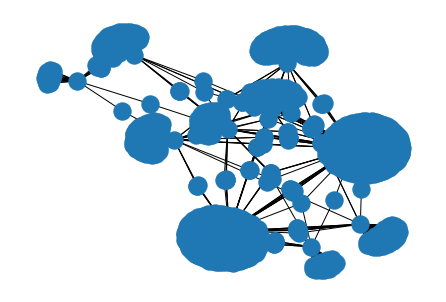

In [83]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.savefig('doc0-10.pdf')

In [ ]:
import torch as T

In [ ]:
class HouseDataset(T.utils.data.Dataset):

    def __init__(self, tmp_x, tmp_y, m_rows=None):
        self.x_data = T.tensor(tmp_x, \
                               dtype=T.float32).to(device)
        self.y_data = T.tensor(tmp_y.reshape(-1, 1), \
                               dtype=T.float32).to(device)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        preds = self.x_data[idx, :]  # or just [idx]
        price = self.y_data[idx, :]
        return (preds, price)  # tuple of two matrices


# -----------------------------------------------------------

class Net(T.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hid1 = T.nn.Linear(100, 100)  # 8-(10-10)-1
        self.hid2 = T.nn.Linear(100, 100)
        self.oupt = T.nn.Linear(100, 1)

        T.nn.init.xavier_uniform_(self.hid1.weight)
        T.nn.init.zeros_(self.hid1.bias)
        T.nn.init.xavier_uniform_(self.hid2.weight)
        T.nn.init.zeros_(self.hid2.bias)
        T.nn.init.xavier_uniform_(self.oupt.weight)
        T.nn.init.zeros_(self.oupt.bias)

    def forward(self, x):
        z = T.relu(self.hid1(x))
        z = T.relu(self.hid2(z))
        z = T.sigmoid(self.oupt(z))  # no activation
        return z


# -----------------------------------------------------------

def accuracy(model, ds, pct):
    # assumes model.eval()
    # percent correct within pct of true house price
    n_correct = 0;
    n_wrong = 0

    for i in range(len(ds)):
        (X, Y) = ds[i]  # (predictors, target)
        with T.no_grad():
            oupt = model(X)  # computed price

        abs_delta = np.abs(oupt.item() - Y.item())
        max_allow = np.abs(pct * Y.item())
        if abs_delta < max_allow:
            n_correct += 1
        else:
            n_wrong += 1

    acc = (n_correct * 1.0) / (n_correct + n_wrong)
    return acc


# -----------------------------------------------------------

def accuracy_quick(model, dataset, pct):
    # assumes model.eval()
    n = len(dataset)
    X = dataset[0:n][0]  # all predictor values
    Y = dataset[0:n][1]  # all target prices
    with T.no_grad():
        oupt = model(X)  # all computed prices

    max_deltas = T.abs(pct * Y)  # max allowable deltas
    abs_deltas = T.abs(oupt - Y)  # actual differences

    results = abs_deltas < max_deltas  # [[True, False, . .]]
    acc = T.sum(results, dim=0).item() / n  # dim not needed
    return acc


In [ ]:

import h5py
import numpy as np
import pickle
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from botdet.data.data_utils import h5group_to_dict
from scipy.sparse import csr_matrix,lil_matrix
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import vstack,hstack
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
import pandas as pd 
class loader:
    
    def __init__(self):
        self.countID=0
        self.G={}
        self.co={}
        self.revco={}
    
    def nodeID(self,x):
        if x not in self.co:
            self.co[x]=self.countID
            self.countID=self.countID+1
            self.revco[self.co[x]]=x
        return self.co[x]
    
    def read(self,file):
        x=pd.read_csv(file,sep=' ',header=None).values
        for a in range(x.shape[0]):
            i=self.nodeID(x[a,0])
            j=self.nodeID(x[a,1])
            self.addEdge((i,j))
        self.fixG()
        
    def storeEmb(self,file,data):
        file1 = open(file, 'w') 
        for a in range(data.shape[0]):
            s=''+str(int(self.revco[a]))
            for b in range(data.shape[1]):
                s+=' '+str(data[a,b])
            file1.write(s+"\n")
        file1.close()
            
    
    def fixG(self):
        for g in range(len(self.G)):
            self.G[g]=np.array([x for x in self.G[g]])

    def addEdge(self,s):
        (l1,l2)=s
        if l1 not in self.G:
            self.G[l1]=set()
        if l2 not in self.G:
            self.G[l2]=set()
        self.G[l1].add(l2)
        self.G[l2].add(l1)

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import random

#g[i][0] nodes outgoing from node i 
class inferentialSirGNKmean:
    
    def __init__(self,n,n1,depth,ngr):
        self.levelsProcessor=[]
        self.n=n
        self.depth=depth
        self.n1=n1
        self.pca= IncrementalPCA(n_components=n1)
        self.scaler=StandardScaler()
        self.ngr=ngr
        self.G={}
        
    
    def transformInternal(self,G):
        nv=len(G) 
        degree=np.array([[G[x][0].shape[0]] for x in range(nv)])
        emb1=degree*np.ones((nv,self.n))
        degree=np.array([[G[x][1].shape[0]] for x in range(nv)])
        emb2=degree*np.ones((nv,self.n))
        emb=np.hstack([emb1,emb2])
        for reg,gmm in self.levelsProcessor:
            emb1=reg.fit_transform(emb)
            val=gmm.transform(emb1)
            M=val.max(axis=1)
            m=val.min(axis=1)
            subx=(M.reshape(nv,1)-val)/(M-m).reshape(nv,1)
            #print(subx.shape)
            su=subx.sum(axis=1)
            #print(su.shape)
            subx=subx/su.reshape(nv,1)
            #print(np.max(np.sum(subx,axis=1)))
            hh=[subx[G[i][0],:].sum(axis=0) if len(G[i][0])>0 else np.zeros(self.n) for  i in range(nv)]
            emb1=np.vstack(hh)
            hh=[subx[G[i][1],:].sum(axis=0) if len(G[i][1])>0 else np.zeros(self.n) for  i in range(nv)]
            emb2=np.vstack(hh)
            emb=np.hstack([emb1,emb2])
        #print(emb)
        return emb
    
    def transformFull(self,G):
        li=[]
        nv=len(G) 
        degree=np.array([[G[x][0].size] for x in g.nodes])
        emb1=degree*np.ones((nv,self.n))
        degree=np.array([[G[x][1].shape[0]] for x in g.nodes])
        emb2=degree*np.ones((nv,self.n))
        emb=np.hstack([emb1,emb2])
        li.append(emb)
        for reg,gmm in self.levelsProcessor:
            emb1=reg.fit_transform(emb)
            val=gmm.transform(emb1)
            M=val.max(axis=1)
            m=val.min(axis=1)
            subx=(M.reshape(nv,1)-val)/(M-m).reshape(nv,1)
            #print(subx.shape)
            su=subx.sum(axis=1)
            #print(su.shape)
            subx=subx/su.reshape(nv,1)
            #print(np.max(np.sum(subx,axis=1)))
            hh=[subx[G[i][0],:].astype(int).sum(axis=0) if G[i][0].size>0 else np.zeros(self.n) for  i in g.nodes]
            emb1=np.vstack(hh)
            hh=[subx[G[i][1],:].astype(int).sum(axis=0) if len(G[i][1])>0 else np.zeros(self.n) for  i in g.nodes]
            emb2=np.vstack(hh)
            emb=np.hstack([emb1,emb2])
            li.append(emb)
        return np.hstack(li)
    
    
    def transform(self,G):
        h=self.transformFull(G)
        return self.pca.transform(self.scaler.transform(h))
    
    def transform1(self,G):
        h=self.transformFull(G)
        return self.scaler.transform(h)
    
    def transform2(self,G):
        h=self.transformFull(G)
        return self.scaler1.transform(self.pca.transform(self.scaler.transform(h)))
    
    def transformGraph(self,G):
        emb1=self.transform2(G)
        nv=len(G) 
        val=self.gkm.transform(emb1)
        M=val.max(axis=1)
        m=val.min(axis=1)
        subx=(M.reshape(nv,1)-val)/(M-m).reshape(nv,1)
        #print(subx.shape)
        su=subx.sum(axis=1)
        #print(su.shape)
        subx=subx/su.reshape(nv,1)
        reprr=np.zeros(( self.ngr, self.ngr))
        for  i in range(nv):
            for j in G[i][0]:
                reprr+=subx[i].reshape((self.ngr,1))*subx[j].reshape((1,self.ngr))
        return reprr
    
    def transformGraph1(self,G):
        emb1=self.transform2(G)
        nv=len(G) 
        val=self.gkm.predict(emb1)
        reprr=np.zeros(( self.ngr, self.ngr))
        for  i in range(nv):
            for j in G[i][0]:
                reprr[val[i],val[j]]+=1
        return reprr     
                
    def edge(self,s):
        (a,b)=s
        if a>b:
            return (b,a)
        else:
            return (a,b)
    
    def generateRandomGraph(self):
        G1={x:[set(),set()] for x in range(self.nnodes)}
        edgepercentage=int(self.nnodes*10*(0.1+0.9*np.random.rand()))
        for i in range(edgepercentage):
            a=random.randint(0,self.nnodes-1)
            b=random.randint(0,self.nnodes-1)
            while b in G1[a]:
                a=random.randint(0,self.nnodes-1)
                b=random.randint(0,self.nnodes-1)
            G1[a][0].add(b)
            G1[b][1].add(a)   
        G1={x:[np.array(list(G1[x][0])),np.array(list(G1[x][1]))] for x in range(self.nnodes)}
        return G1
    
    def fit_scaler(self, epochs):
        scaler=StandardScaler()
        for i in range(epochs):
            G=self.generateRandomGraph()
            scaler.partial_fit(self.transformInternal(G))
        return scaler
    
    def fit_scaler1(self, epochs):
        scaler=StandardScaler()
        for i in range(epochs):
            G=self.generateRandomGraph()
            scaler.partial_fit(self.transformFull(G))
        return scaler
    
    def fit_scaler2(self, epochs):
        scaler=StandardScaler()
        for i in range(epochs):
            G=self.generateRandomGraph()
            scaler.partial_fit(self.transform(G))
        return scaler
    
    def fit_scaler_PCA(self, epochs):
        self.scaler=self.fit_scaler1(epochs)
        self.pca= IncrementalPCA(n_components=self.n1)
        for i in range(epochs):
            G=self.generateRandomGraph()
            self.pca.partial_fit(self.scaler.transform(self.transformFull(G)))
        self.scaler1=self.fit_scaler2(epochs)
    
    def fit_graph_representation(self,epochs):
        gmm= MiniBatchKMeans(n_clusters=self.ngr)
        for i in range(epochs):
            #print('epochs',i)
            G=self.generateRandomGraph()
            gmm.partial_fit(self.transform2(G))
        return gmm
    
    def fit_scaler_gmm(self, epochs):
        scaler=self.fit_scaler(epochs)
        gmm= MiniBatchKMeans(n_clusters=self.n)
        for i in range(epochs):
            #print('epochs',i)
            G=self.generateRandomGraph()
            gmm.partial_fit(scaler.transform(self.transformInternal(G)))
        return (scaler,gmm)
        
        
    def universalFit(self,nnodes,epochs):
        self.levelsProcessor=[]
        self.nnodes=nnodes
        for i in range(self.depth):
            print('depth',i)
            self.levelsProcessor.append(self.fit_scaler_gmm(epochs))
        self.fit_scaler_PCA(epochs)
        self.gkm=self.fit_graph_representation(epochs)
        return self
    


In [ ]:
isirgn1 = pickle.load( open( "sirgn2.obj", "rb" ) )

In [ ]:
len(G)

In [ ]:
isirgn1.transformFull(formGraph)

In [ ]:
formGraph['doc0'][0]

In [ ]:
formGraph['mice'][0].size

In [ ]:
formGraph['mice'][1].shape[0]

In [ ]:
formGraph

In [ ]:
# # for i in range(0,767):
# # g = nx.from_pandas_edgelist(df, 'word', 'document', ['weight'])
# # g = nx.Graph()
# # graph_dict = h5group_to_dict(h5py.File('data/botnet/processed/p2p_train.hdf5', 'r')[str(i)])
# # g.add_nodes_from(range(df['word']))
# # g.add_edges_from(zip(df['word'], df['document']))
# formGraph = nx.to_dict_of_lists(g)
# # for j in g.nodes:
# #     formGraph[j] = [formGraph[j],[]]
# # for j in range(0,len(g)):
# #     formGraph[df['word'][j]][1].append(df['document'][j])   
# for j in g.nodes:
# #     print(j)
#     formGraph[j] = [np.array(formGraph[j][0]),np.array(formGraph[j])]   
sweights = isirgn1.transform(formGraph)
#     count = 0
#     botnodeIndex = []
#     notBotnodeIndex = []
#     for y in graph_dict['y']:
#         if(y == 1):
#             botnodeIndex.append(count)
#         else:
#             notBotnodeIndex.append(count)
#         count = count + 1
#     randomBotIndex = random.sample(botnodeIndex,100)
#     randomNotBotIndex = random.sample(notBotnodeIndex,100)
#     newIndex = randomBotIndex + randomNotBotIndex
#     if(i == 0):
#         combinedWeights = sweights[newIndex]
#         combinedY = graph_dict['y'][newIndex]
#     else:
#         combinedWeights = np.concatenate((combinedWeights,sweights[newIndex]), axis=0)
#         combinedY = np.append(combinedY,graph_dict['y'][newIndex])
#     print(i)
# pickle.dump(combinedWeights,open( "p2p_weights.obj", "wb" ) )
# pickle.dump(combinedY,open( "p2p_Y.obj", "wb" ) )
# clf = RandomForestClassifier(class_weight="balanced",random_state=0, n_estimators=1000, warm_start=True)
# clf.fit(combinedWeights, combinedY)
# pickle.dump( clf, open( "isirgn1_rfc_p2p_fixed_4.obj", "wb" ) )
print(sweights)



In [ ]:
train_ds = HouseDataset(sweights, combinedY)  # all 200 rows

bat_size = 10
train_ldr = T.utils.data.DataLoader(train_ds,
                                    batch_size=bat_size, shuffle=True)

# print(f"\nStarting training with saved checkpoints: {i}")
for epoch in range(0, 5):
    T.manual_seed(1 + epoch)  # recovery reproducibility
    epoch_loss = 0  # for one full epoch

    # new random set of graphs and new 10 batch set for each epoch

    for (batch_idx, batch) in enumerate(train_ldr):
        (X, Y) = batch  # (predictors, targets)
        optimizer.zero_grad()  # prepare gradients
        oupt = net(X)  # predicted prices
        loss_val = loss_func(oupt, Y)  # avg per item in batch
        epoch_loss += loss_val.item()  # accumulate avgs
        loss_val.backward()  # compute gradients
        optimizer.step()  # update wts

    if epoch % ep_log_interval == 0:
        print("epoch = %4d   loss = %0.4f" % \
              (epoch, epoch_loss))

        # save checkpoint
        dt = time.strftime("%Y_%m_%d-%H_%M_%S")
        fn = ".\\Log\\" + str(dt) + str("-") + \
             str(epoch) + "_checkpoint.pt"

        info_dict = {
            'epoch': epoch,
            'net_state': net.state_dict(),
            'optimizer_state': optimizer.state_dict()
        }
        T.save(info_dict, fn)
ch = 1
print("\nSaving trained model state")
fn = ".\\Models\\textGNN.pth"
T.save(net.state_dict(), fn)

print("Done ")

In [5]:
import os
import pandas as pd

 
os.environ['JDK_HOME'] = "C:\Program Files\Java\jdk-12.0.1\bin"
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-12.0.1\bin"

os.environ['PATH'] += ';C:\\Program Files\\Java\\jdk-12.0.1\\bin\\server\\;C:\\Program Files\\Java\\jdk-12.0.1\\bin\\'

In [6]:
import pyterrier as pt
if not pt.started():
    pt.init()

c:\users\jncwi\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
index_path = "./index"

In [ ]:
# !rm -rf ./index
indexer = pt.TRECCollectionIndexer(index_path, blocks=True)

In [7]:
import pandas as pd
# !rm -rf ./pd_index
pd_indexer = pt.DFIndexer("C:\\Users\\jncwi\\OneDrive\\School\\CS637\\textGCN\\pd_index")

In [ ]:
train.reset_index()['index'].astype(str)

In [ ]:
df2 = train[[3]]
df2

In [ ]:
df2['length'] = df2[3].str.len()

In [ ]:
df2 = df2[df2.length > 10]
df2

In [ ]:
df2 = train[[3]].dropna()
df2

In [ ]:
df2 = df2.dropna()

In [ ]:
df2 = df2.reset_index()[[3]]

In [ ]:
df2 = train.dropna()
df2

In [ ]:
df2[3]

In [ ]:
df2

In [ ]:
df2 = df2.reset_index().astype(str)

In [ ]:
df2['index']

In [ ]:
df2[3]

In [ ]:
# no metadata
# pd_indexer.index(df2[3].astype(str))

# Add metadata fields as Pandas.Series objects, with the name of the Series object becoming the name of the meta field.
indexref2 = pd_indexer.index(df2[3],df2['index'])
# pd_indexer.index(df["text"], df["docno"], df["url"])

# Add metadata fields as lists to a keyword arguement
# pd_indexer.index(df["text"], docno=["1","2","3"], url=["url1", "url2", "url3"])

# Add the metadata fields with a dictionary
# meta_fields={"docno":["1","2","3"],"url":["url1", "url2", "url3"]}
# pd_indexer.index(df["text"], **meta_fields)

# Add the entire dataframe as metadata
# pd_indexer.index(df2[3], df2)

In [ ]:
df2

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stopwordsList = stopwords.words('english')
stop_words = set(stopwords.words('english'))
train1 = train[[1,3]].dropna()
for docnum in range(len(train)):
    if(docnum % 100000 == 0):
        print(docnum)
    q1_noGrammer = tokenizer.tokenize(train1[3].values[docnum])
    # q1_word_tokens = word_tokenize(q1_noGrammer)
    filtered_sentence_q1 = [ps.stem(w.lower()) for w in q1_noGrammer if not w.lower() in stop_words]
    df = pd.DataFrame()
#     print(filtered_sentence_q1)
    df['document'] = [f'{docnum}']
    df['sentence'] = [' '.join(filtered_sentence_q1)]
#     print(df)
    if not os.path.isfile('inv_index_df.csv'):
        df.to_csv('inv_index_df.csv', header='column_names')
    else: # else it exists so append without writing the header
        df.to_csv('inv_index_df.csv', mode='a', header=False)

In [8]:
df = pd.read_csv('inv_index_df.csv')
df

,Unnamed: 0,document,sentence
0,0,0,optic mice use led camera rapidli captur imag ...
1,0,1,hear mojav road amaz br nsearch onlin
2,0,2,tran fat occur manufactur food process partial...
3,0,3,accord www fedex com web site nair fleet br n ...
4,0,4,rent vs buy depend goal br ngener think buy be...
...,...,...,...
1018531,0,1018531,believ that tad averag anyway lower exercis al...
1018532,0,1018532,santa real start man pass toy boy girl town na...
1018533,0,1018533,yogurt great diet food long choos plain nonfat...
1018534,0,1018534,yea read profil wikepedia think great think go...


In [9]:
df = pd.read_csv('inv_index_df.csv')
df = df[['document','sentence']]
df

,document,sentence
0,0,optic mice use led camera rapidli captur imag ...
1,1,hear mojav road amaz br nsearch onlin
2,2,tran fat occur manufactur food process partial...
3,3,accord www fedex com web site nair fleet br n ...
4,4,rent vs buy depend goal br ngener think buy be...
...,...,...
1018531,1018531,believ that tad averag anyway lower exercis al...
1018532,1018532,santa real start man pass toy boy girl town na...
1018533,1018533,yogurt great diet food long choos plain nonfat...
1018534,1018534,yea read profil wikepedia think great think go...


In [10]:
df = df.rename(columns={"document": "docno", "sentence": "text"})

In [11]:
df['docno'] = df['docno'].astype(str)

In [ ]:
indexref2 = pd_indexer.index(df['text'],df['docno'])


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import os
import pandas as pd

os.environ['JDK_HOME'] = "C:\Program Files\Java\jdk-12.0.1\bin"
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-12.0.1\bin"

os.environ['PATH'] += ';C:\\Program Files\\Java\\jdk-12.0.1\\bin\\server\\;C:\\Program Files\\Java\\jdk-12.0.1\\bin\\'
import pyterrier as pt
if not pt.started():
    pt.init()
import pandas as pd
# !rm -rf ./pd_index
pd_indexer = pt.DFIndexer("C:\\Users\\jncwi\\OneDrive\\School\\CS637\\textGCN\\pd_index")
df = pd.read_csv('inv_index_df.csv')
df = df[['document','sentence']]
df = df.rename(columns={"document": "docno", "sentence": "text"})
df['docno'] = df['docno'].astype(str)
indexref2 = pd_indexer.index(df['text'],df['docno'])


c:\users\jncwi\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import os
import pandas as pd
os.environ['JDK_HOME'] = "C:/Program Files/Java/jdk-12.0.1/bin"
os.environ['JAVA_HOME'] = "C:/Program Files/Java/jdk-12.0.1/bin"
os.environ['PATH'] += ';C:/Program Files/Java/jdk-12.0.1/bin/server/;C:/Program Files/Java/jdk-12.0.1/bin/'
import pyterrier as pt
if not pt.started():
    pt.init()
import urllib
import io
def antique_doc_iter():
    df = pd.read_csv('inv_index_df.csv')
    df = df[['document','sentence']]
    df = df.rename(columns={"document": "docno", "sentence": "text"})
    df['docno'] = df['docno'].astype(str)
    df = df.dropna()
    for i, line in df.iterrows():
        if i % 100000 == 0:
            print(f'processing document {i}')
        if(len(line['text']) > 10):   
            yield {'docno': line['docno'], 'text': line['text']}

iter_indexer = pt.IterDictIndexer("C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index_3")

doc_iter = antique_doc_iter()
indexref3 = iter_indexer.index(doc_iter)

processing document 0
17:13:13.835 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (4733) - further warnings are suppressed
processing document 100000
processing document 200000
processing document 300000
processing document 400000
processing document 500000
processing document 600000
processing document 700000
processing document 800000
processing document 900000
processing document 1000000
17:20:13.097 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 454 empty documents


In [15]:
pt.get_dataset('iter_index_3/data.properties')

KeyError: 'iter_index_3/data.properties'

In [47]:
indexref3.toString()

'C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index_3/data.properties'

In [24]:
pt.BatchRetrieve('C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index_3/data.properties').search("mathematical")


,qid,docid,docno,rank,score,query
0,1,419162,445641,0,8.101605,mathematical
1,1,773368,822921,1,8.050195,mathematical
2,1,722373,768903,2,7.933636,mathematical
3,1,336430,357643,3,7.882351,mathematical
4,1,117681,124834,4,7.854252,mathematical
...,...,...,...,...,...,...
995,1,904800,961553,995,4.387786,mathematical
996,1,929331,987449,996,4.387786,mathematical
997,1,11627,12261,997,4.377707,mathematical
998,1,120779,128141,998,4.377707,mathematical


In [25]:
index = pt.IndexFactory.of('C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index_3/data.properties')
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")
pl2 = pt.BatchRetrieve(index, wmodel="PL2")



In [27]:
dataset = pt.get_dataset("vaswani")

In [28]:
dataset.get_topics()

RemoteDataset for vaswani, with ['corpus', 'topics', 'qrels', 'index', 'info_url', 'corpus_iter']

In [29]:
dataset.get_topics()

query-text.trec: 10.7kiB [00:00, 5.54MiB/s]                                                                            

13:25:31.676 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


,qid,query
0,1,measurement of dielectric constant of liquids ...
1,2,mathematical analysis and design details of wa...
2,3,use of digital computers in the design of band...
3,4,systems of data coding for information transfer
4,5,use of programs in engineering testing of comp...
...,...,...
88,89,tunnel diode construction and its electrical c...
89,90,electronic density of states at the surface of...
90,91,resistivity of metallic thin films related to ...
91,92,the phenomenon of radiation caused by charged ...


In [39]:
df = pd.read_csv('inv_index_df.csv')
df = df[['document','sentence']]
df = df.rename(columns={"document": "qid", "sentence": "query"})
df['qid'] = df['qid'].astype(str)
df = df.dropna()
df

,qid,query
0,0,optic mice use led camera rapidli captur imag ...
1,1,hear mojav road amaz br nsearch onlin
2,2,tran fat occur manufactur food process partial...
3,3,accord www fedex com web site nair fleet br n ...
4,4,rent vs buy depend goal br ngener think buy be...
...,...,...
1018531,1018531,believ that tad averag anyway lower exercis al...
1018532,1018532,santa real start man pass toy boy girl town na...
1018533,1018533,yogurt great diet food long choos plain nonfat...
1018534,1018534,yea read profil wikepedia think great think go...


In [35]:
df.reset_index()[['index','docno']]

,index,docno
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1013292,1018531,1018531
1013293,1018532,1018532
1013294,1018533,1018533
1013295,1018534,1018534


In [30]:
dataset.get_qrels()

qrels: 24.3kiB [00:00, 3.34MiB/s]                                                                                      


,qid,docno,label
0,1,1239,1
1,1,1502,1
2,1,4462,1
3,1,4569,1
4,1,5472,1
...,...,...,...
2078,93,9875,1
2079,93,9956,1
2080,93,10497,1
2081,93,11191,1


In [42]:
df.reset_index()[['index','qid']].rename(columns={"index": "docno", "qid": "qid"})

,docno,qid
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1013292,1018531,1018531
1013293,1018532,1018532
1013294,1018533,1018533
1013295,1018534,1018534


In [49]:
df2 = df.reset_index()[['index','qid']].rename(columns={"index": "docno", "qid": "qid"})

In [50]:
df2['label'] = 1

In [51]:
df2

,docno,qid,label
0,0,0,1
1,1,1,1
2,2,2,1
3,3,3,1
4,4,4,1
...,...,...,...
1013292,1018531,1018531,1
1013293,1018532,1018532,1
1013294,1018533,1018533,1
1013295,1018534,1018534,1


In [ ]:
pt.Experiment(
    [tf_idf, bm25],
    df,
    df2,
    eval_metrics=["map", "recip_rank"],
    names=["TF_IDF", "BM25"],
    filter_by_topics = True,
    filter_by_qrels = True,
    save_dir="./results",
    save_mode="overwrite"
)


In [ ]:
df = pd.read('top_10_subGNN_predictions.csv')

In [ ]:
pt.Experiment(
    [tf_idf, bm25],
    df,
    df2,
    eval_metrics=["map", "recip_rank"],
    names=["TF_IDF", "BM25"],
    filter_by_topics = True,
    filter_by_qrels = True,
    save_dir="./results",
    save_mode="overwrite"
)


In [16]:
index = pt.IndexFactory.of('iter_index_3/data.properties')
print(index.getCollectionStatistics().toString())

JavaException: JVM exception occurred: Could not load an index for ref iter_index_3/data.properties, even though IndexLoader org.terrier.structures.IndexOnDisk$DiskIndexLoader could support that type of index. It may be your ref had a wrong location; Terrier logs may have more information. java.lang.IllegalArgumentException

In [31]:
topics = train.reset_index()[['index',1]].rename(columns={"index": "qid", 1: "query"})

In [32]:
topics.head(5)

,qid,query
0,0,why doesn't an optical mouse work on a glass t...
1,1,What is the best off-road motorcycle trail ?
2,2,What is Trans Fat? How to reduce that?
3,3,How many planes Fedex has?
4,4,"In the san francisco bay area, does it make se..."


In [39]:
iter_indexer = pt.IterDictIndexer('C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties', blocks=True)

In [41]:
pt.BatchRetrieve(iter_indexer).search("mathematical")

JavaException: JVM exception occurred: No Manager implementation found for index C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties\data.properties (IndexRef) - Do you need to import another package (terrer-core or terrier-rest-client)? Or perhaps the index location is wrong. Found builders were org.terrier.querying.LocalManager$Builder,org.terrier.restclient.RestClientManagerBuilder,org.terrier.querying.ThreadSafeManager$Builder java.lang.IllegalArgumentException

In [40]:
indexref = indexer.index(iter_indexer)

ValueError: <pyterrier.index._IterDictIndexer_nofifo object at 0x0000018633C52A48>: <class 'pyterrier.index._IterDictIndexer_nofifo'> must be a List[str] or str

In [35]:
index = pt.IndexFactory.of('C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties')

JavaException: JVM exception occurred: No IndexLoaders were supported for indexref C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties; It may be your ref has the wrong location. Alternatively, Terrier is misconfigured - did you import the correct package to deal with this indexref? java.lang.UnsupportedOperationException

In [24]:
index = pt.IndexFactory.of(indexref)
retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"})

retr.setControl("wmodel", "TF_IDF")
retr.setControls({"wmodel": "TF_IDF"})

res=retr.transform(topics)

data.direct.bf: 100%|███████████████████████████████████████████████████████████████| 388k/388k [00:00<00:00, 530kiB/s]
data.document.fsarrayfile: 100%|████████████████████████████████████████████████████| 234k/234k [00:00<00:00, 332kiB/s]
data.inverted.bf: 100%|█████████████████████████████████████████████████████████████| 362k/362k [00:00<00:00, 498kiB/s]
data.lexicon.fsomapfile: 100%|██████████████████████████████████████████████████████| 682k/682k [00:01<00:00, 642kiB/s]
data.lexicon.fsomaphash: 100%|███████████████████████████████████████████████████████| 777/777 [00:00<00:00, 1.56MiB/s]
data.lexicon.fsomapid:  43%|██████████████████████▋                              | 13.0k/30.3k [00:00<00:00, 74.1kiB/s]


KeyboardInterrupt: 

In [19]:
pt.BatchRetrieve('C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties').search("math")


JavaException: JVM exception occurred: No Manager implementation found for index C:/Users/jncwi/OneDrive/School/CS637/textGCN/iter_index/data.properties (IndexRef) - Do you need to import another package (terrer-core or terrier-rest-client)? Or perhaps the index location is wrong. Found builders were org.terrier.querying.LocalManager$Builder,org.terrier.restclient.RestClientManagerBuilder,org.terrier.querying.ThreadSafeManager$Builder java.lang.IllegalArgumentException

In [ ]:
# no metadata
# pd_indexer.index(df["sentence"])

# Add metadata fields as Pandas.Series objects, with the name of the Series object becoming the name of the meta field.
# indexref2 = pd_indexer.index(df["sentence"], df["document"])
# pd_indexer.index(df["text"], df["docno"], df["url"])

# Add metadata fields as lists to a keyword arguement
# pd_indexer.index(df["text"], docno=["1","2","3"], url=["url1", "url2", "url3"])

# Add the metadata fields with a dictionary
# meta_fields={"docno":["1","2","3"],"url":["url1", "url2", "url3"]}
# pd_indexer.index(df["text"], **meta_fields)

# Add the entire dataframe as metadata
pd_indexer.index(df["sentence"], df)